In [1]:
import numpy as np    
import uproot3
import matplotlib.pyplot as plt

In [2]:
infile = '/Users/yw18581/Downloads/largedrum_1L_dense_MedianCut_3cmVoxel_withoutCut.discriminator.root'

##### Import file and histogram

In [3]:
fu = uproot3.open(infile)
histogram = fu['histMedianMetric'].numpy()[0]
bins_x, bins_y, bins_z = fu['histMedianMetric;1'].numpy()[1][0]

In [4]:
shape_x, shape_y, shape_z = histogram.shape

##### Plot 1D histogram of discriminator values

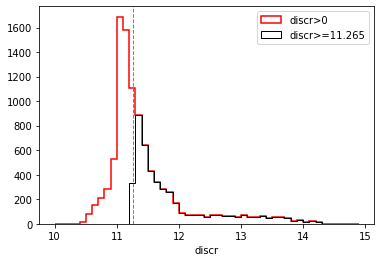

In [5]:
mybins = np.arange(10,15,.1)
plt.hist(histogram.ravel(), bins = mybins,edgecolor='red', linewidth=1.5,histtype=u'step', label='discr>0')
plt.hist(histogram[histogram>=11.265], bins=mybins,  edgecolor='k', histtype=u'step',label='discr>=11.265')
plt.axvline(x=11.265, linestyle='--', c='gray', linewidth=1)
plt.legend(loc='upper right')
plt.xlabel('discr')
plt.show()

##### Function that calculates cube of 3x3x3 (27) neighbours

In [6]:
def cube(x, y, z):
    if x in [0,shape_x-1] or y in [0, shape_y-1] or z in [0, shape_z-1]:
        return None
    mgrid = np.mgrid[x-1:x+2:1, y-1:y+2:1, z-1:z+2:1]
    x, y, z = map(np.ravel, mgrid)
    return x, y, z

##### Calculate neighbours and counts for bitumen voxels


###### Using entire histogram - no selection

**centre**: bitumen; **surrounding voxels**: bitumen


In [7]:
thresh=11.265
stats_bt_bt = dict()
xx, yy, zz = np.where(histogram<thresh)
for x, y, z in zip(xx, yy, zz):
    cubes_coord = cube(x, y, z)
    if cubes_coord is None:
        continue
    xs, ys, zs = cubes_coord
    triplets = np.array([(i, j, k) for (i, j, k) in zip(xs, ys, zs)])
    cube_around_pt = np.array([histogram[cx, cy, cz] for (cx, cy, cz) in triplets])
    filtered_cube = cube_around_pt[cube_around_pt < thresh]
    below_threshold_count = (len(filtered_cube) -1) if (len(filtered_cube) > 0) else 0.
    stats_bt_bt[(x, y, z)] = below_threshold_count

**centre**: bitumen; **surrounding voxels**: air

In [8]:
thresh=11.265
stats_bt_air = dict()
xx, yy, zz = np.where(histogram<thresh)
for x, y, z in zip(xx, yy, zz):
    cubes_coord = cube(x, y, z)
    if cubes_coord is None:
        continue
    xs, ys, zs = cubes_coord
    triplets = np.array([(i, j, k) for (i, j, k) in zip(xs, ys, zs)])
    cube_around_pt = np.array([histogram[cx, cy, cz] for (cx, cy, cz) in triplets])
    filtered_cube = cube_around_pt[cube_around_pt >= thresh]
    above_threshold_count = len(filtered_cube)
    stats_bt_air[(x, y, z)] = above_threshold_count

plot both

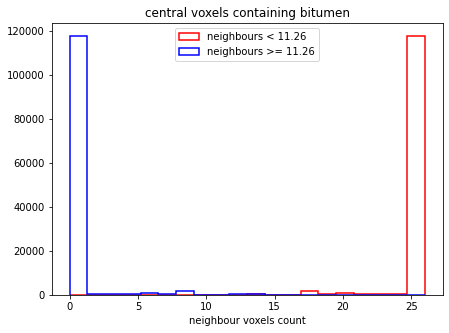

In [9]:
plt.figure(figsize=(7,5))
plot_kwds = {'density': False, 'linewidth':"1.5", 'histtype': u'step', "bins":20}
plt.hist(stats_bt_bt.values(), label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(stats_bt_air.values(), label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("central voxels containing bitumen")
plt.xlabel('neighbour voxels count')
plt.legend(loc='upper center')

#plt.savefig("neighbour_voxels_ct.png") 
plt.show()

##### Voxels containing Hydrogen

centre: air; surrounding voxels: air

In [10]:
thresh=11.265
stats_air_air = dict()
xx, yy, zz = np.where(histogram>=thresh)
for x, y, z in zip(xx, yy, zz):
    cubes_coord = cube(x, y, z)
    if cubes_coord is None:
        continue
    xs, ys, zs = cubes_coord
    #xs, ys, zs = map(np.ravel, cubes_coord)
    triplets = np.array([(i, j, k) for (i, j, k) in zip(xs, ys, zs)])
    #cx, cy, cz = cubes_coord
    cube_around_pt = np.array([histogram[cx, cy, cz] for (cx, cy, cz) in triplets])
    filtered_cube = cube_around_pt[cube_around_pt >= thresh]
    above_threshold_count = (len(filtered_cube) -1) if (len(filtered_cube) > 0) else 0.
    stats_air_air[(x, y, z)] = above_threshold_count

centre: air; surrounding voxels: bitumen

In [11]:
thresh=11.265
stats_air_bt = dict()
xx, yy, zz = np.where(histogram>=thresh)
for x, y, z in zip(xx, yy, zz):
    cubes_coord = cube(x, y, z)
    if cubes_coord is None:
        continue
    xs, ys, zs = cubes_coord
    #xs, ys, zs = map(np.ravel, cubes_coord)
    triplets = np.array([(i, j, k) for (i, j, k) in zip(xs, ys, zs)])
    #cx, cy, cz = cubes_coord
    cube_around_pt = np.array([histogram[cx, cy, cz] for (cx, cy, cz) in triplets])
    filtered_cube = cube_around_pt[cube_around_pt < thresh]
    below_threshold_count = len(filtered_cube)
    stats_air_bt[(x, y, z)] = below_threshold_count



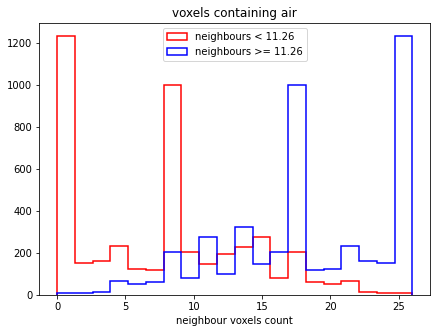

In [12]:
plt.figure(figsize=(7,5))
plot_kwds = {'density': False, 'linewidth':"1.5", 'histtype': u'step', "bins":20}
plt.hist(stats_air_bt.values(), label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(stats_air_air.values(), label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("voxels containing air")
plt.xlabel('neighbour voxels count')
plt.legend(loc='upper center')
#plt.savefig("neighbour_voxels_air.png") 
plt.show()

##### Repeat for this selection of coordinates:
- x: [-440; 400]
- y: [-300; 300]
- z: [-300; 300]

In [49]:
sel_x = np.where(np.logical_and(bins_x>=-300, bins_x<=300))[0]
sel_y = np.where(np.logical_and(bins_y>=-300, bins_y<=300))[0]
sel_z = np.where(np.logical_and(bins_z>=-200, bins_z<=200))[0]
sel_hist = np.meshgrid(sel_x,sel_y,sel_z)

selected_histogram = np.copy(histogram[tuple(sel_hist)])
shape_x, shape_y, shape_z = selected_histogram.shape


##### Look at distribution of discriminator values

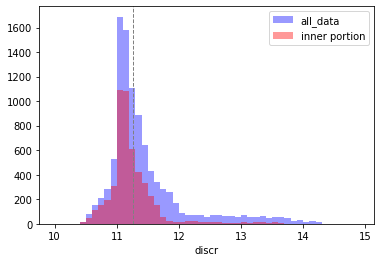

In [50]:
mybins = np.arange(10,15,.1)
plt.hist(histogram.ravel(), bins = mybins,color='blue', linewidth=1.5,label='all_data', alpha=.4)
plt.hist(selected_histogram.ravel(), bins = mybins, color='red', linewidth=1.5, label='inner portion', alpha=.4)
#plt.hist(selected_histogram[selected_histogram>=11.265], bins=mybins,  edgecolor='k', histtype=u'step',label='discr>=11.265')
plt.axvline(x=11.265, linestyle='--', c='gray', linewidth=1)
plt.legend(loc='upper right')
plt.xlabel('discr')
plt.show()

#### Voxels containing Bitumen

centre: bitumen; surrounding voxels: bitumen

In [51]:
thresh=11.265
stats_bt_bt = dict()
xx, yy, zz = np.where(selected_histogram<thresh)
for x, y, z in zip(xx, yy, zz):
    cubes_coord = cube(x, y, z)
    if cubes_coord is None:
        continue
    xs, ys, zs = cubes_coord
    triplets = np.array([(i, j, k) for (i, j, k) in zip(xs, ys, zs)])
    cube_around_pt = np.array([selected_histogram[cx, cy, cz] for (cx, cy, cz) in triplets])
    filtered_cube = cube_around_pt[cube_around_pt < thresh]
    below_threshold_count = (len(filtered_cube) -1) if (len(filtered_cube) > 0) else 0.
    stats_bt_bt[(x, y, z)] = below_threshold_count

centre: bitumen; surrounding voxels: air

In [52]:
thresh=11.265
stats_bt_air = dict()
xx, yy, zz = np.where(selected_histogram<thresh)
for x, y, z in zip(xx, yy, zz):
    cubes_coord = cube(x, y, z)
    if cubes_coord is None:
        continue
    xs, ys, zs = cubes_coord
    triplets = np.array([(i, j, k) for (i, j, k) in zip(xs, ys, zs)])
    cube_around_pt = np.array([selected_histogram[cx, cy, cz] for (cx, cy, cz) in triplets])
    filtered_cube = cube_around_pt[cube_around_pt >= thresh]
    above_threshold_count = len(filtered_cube)
    stats_bt_air[(x, y, z)] = above_threshold_count

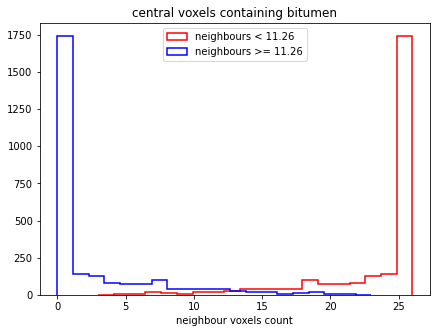

In [53]:
plt.figure(figsize=(7,5))
plot_kwds = {'density': False, 'linewidth':"1.5", 'histtype': u'step', "bins":20}
plt.hist(stats_bt_bt.values(), label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(stats_bt_air.values(), label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("central voxels containing bitumen")
plt.xlabel('neighbour voxels count')
plt.legend(loc='upper center')

#plt.savefig("neighbour_voxels_ct.png") 
plt.show()

##### Voxels containing Hydrogen

centre: air; surrounding voxels: air

In [54]:
thresh=11.265
stats_air_air = dict()
xx, yy, zz = np.where(selected_histogram>=thresh)
for x, y, z in zip(xx, yy, zz):
    cubes_coord = cube(x, y, z)
    if cubes_coord is None:
        continue
    xs, ys, zs = cubes_coord
    #xs, ys, zs = map(np.ravel, cubes_coord)
    triplets = np.array([(i, j, k) for (i, j, k) in zip(xs, ys, zs)])
    #cx, cy, cz = cubes_coord
    cube_around_pt = np.array([selected_histogram[cx, cy, cz] for (cx, cy, cz) in triplets])
    filtered_cube = cube_around_pt[cube_around_pt >= thresh]
    above_threshold_count = (len(filtered_cube) -1) if (len(filtered_cube) > 0) else 0.
    stats_air_air[(x, y, z)] = above_threshold_count

centre: air; surrounding voxels: bitumen



In [55]:
thresh=11.265
stats_air_bt = dict()
xx, yy, zz = np.where(selected_histogram>=thresh)
for x, y, z in zip(xx, yy, zz):
    cubes_coord = cube(x, y, z)
    if cubes_coord is None:
        continue
    xs, ys, zs = cubes_coord
    #xs, ys, zs = map(np.ravel, cubes_coord)
    triplets = np.array([(i, j, k) for (i, j, k) in zip(xs, ys, zs)])
    #cx, cy, cz = cubes_coord
    cube_around_pt = np.array([selected_histogram[cx, cy, cz] for (cx, cy, cz) in triplets])
    filtered_cube = cube_around_pt[cube_around_pt < thresh]
    below_threshold_count = len(filtered_cube)
    stats_air_bt[(x, y, z)] = below_threshold_count



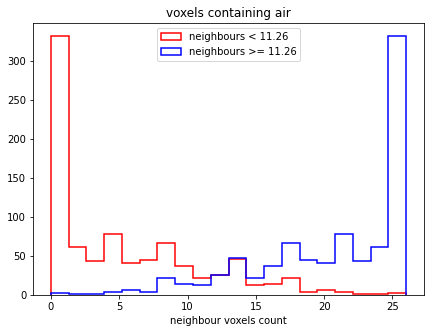

In [56]:
plt.figure(figsize=(7,5))
plot_kwds = {'density': False, 'linewidth':"1.5", 'histtype': u'step', "bins":20}
plt.hist(stats_air_bt.values(), label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(stats_air_air.values(), label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("voxels containing air")
plt.xlabel('neighbour voxels count')
plt.legend(loc='upper center')
#plt.savefig("neighbour_voxels_air.png") 
plt.show()


#### 3D map of voxels over threshold ( no selection ) 

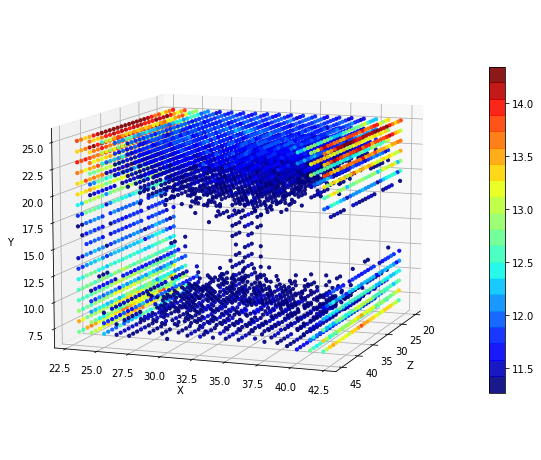

In [57]:
cmap = plt.cm.get_cmap('jet',20)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection="3d")

xx, yy, zz = np.where(histogram >= 11.265)
pnt3d = ax.scatter(xx, yy, zz, c=histogram[histogram>=11.265], 
                   cmap=cmap, s=10, alpha=.9)
cbar=plt.colorbar(pnt3d, shrink=0.6)
ax.set_xlabel('Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')
ax.view_init(elev=10, azim=20)
plt.draw()

#### 3D map of selected histogram

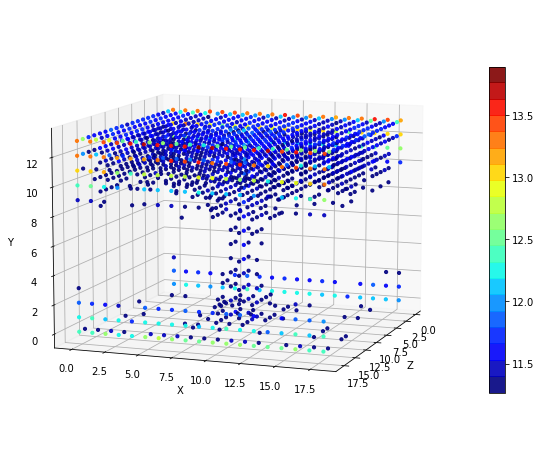

In [58]:
cmap = plt.cm.get_cmap('jet',20)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection="3d")

xx, yy, zz = np.where(selected_histogram >= 11.265)
pnt3d = ax.scatter(xx, yy, zz, c=selected_histogram[selected_histogram>=11.265], 
                   cmap=cmap, s=10, alpha=.9)
cbar=plt.colorbar(pnt3d, shrink=0.6)
ax.set_xlabel('Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')

ax.view_init(elev=10, azim=20)
plt.show()

### sliced y-x view

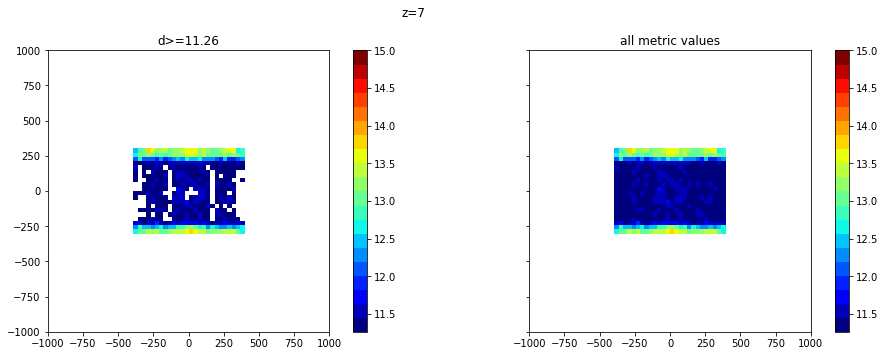

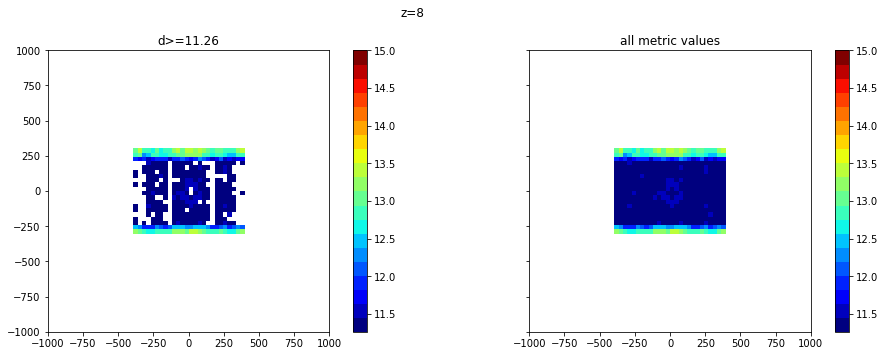

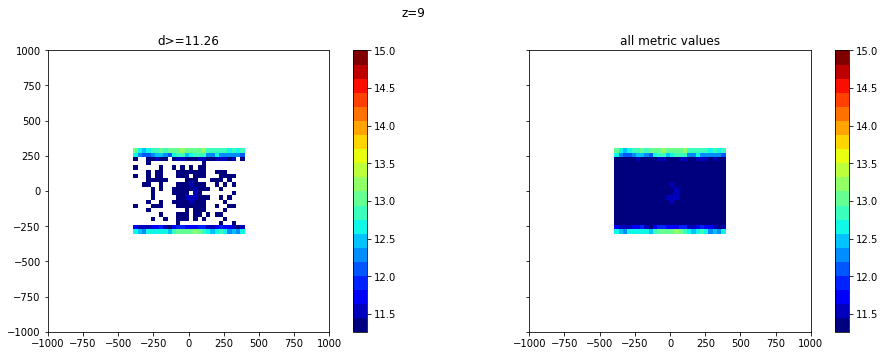

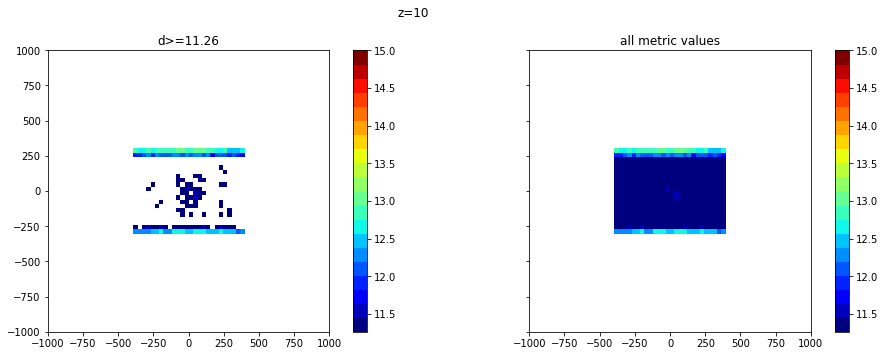

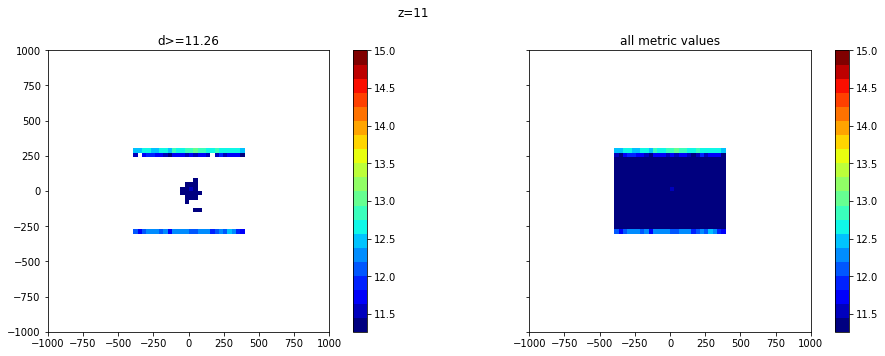

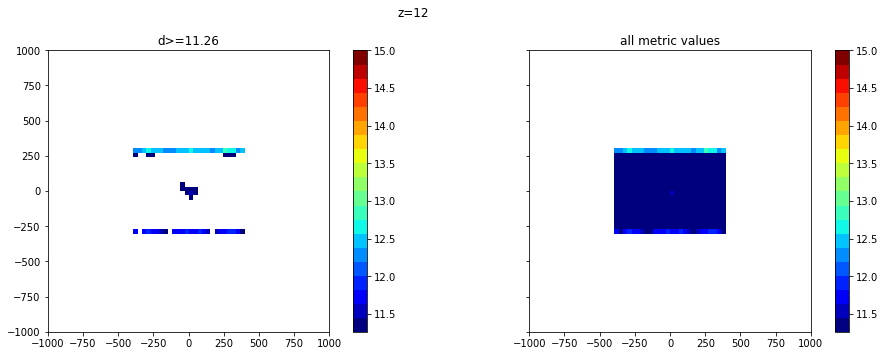

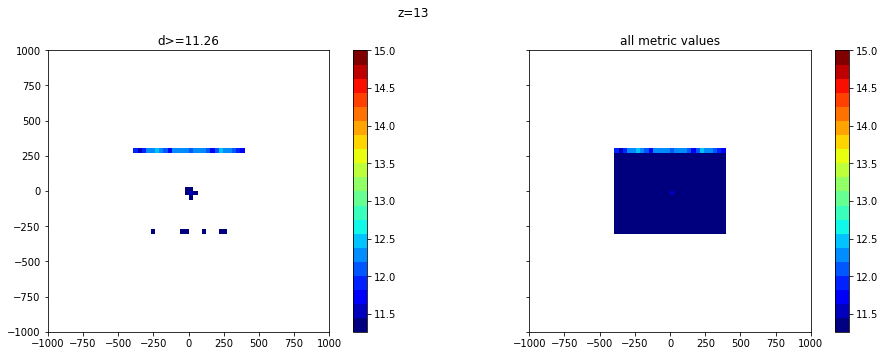

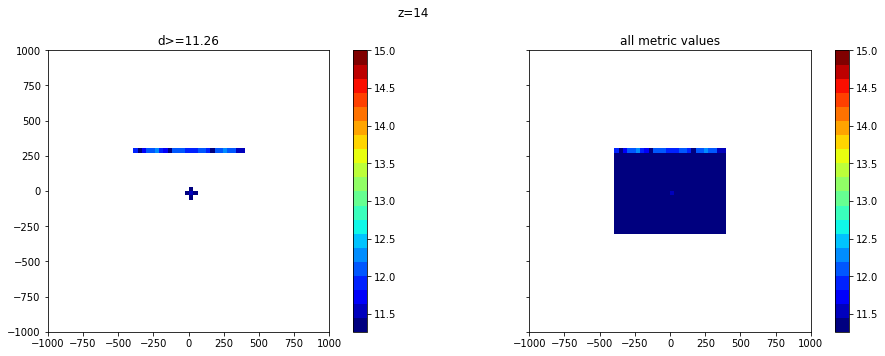

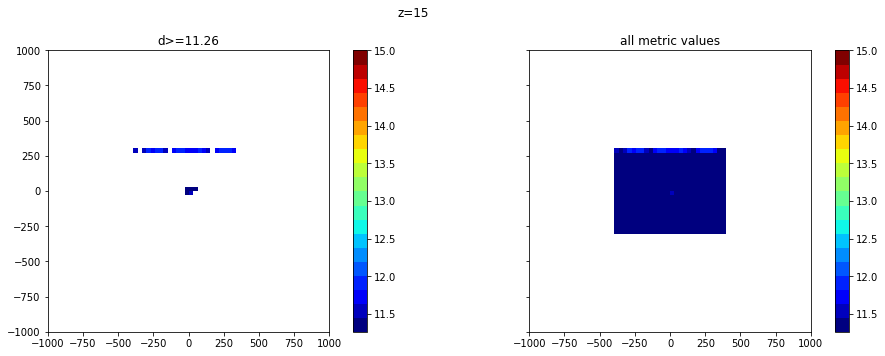

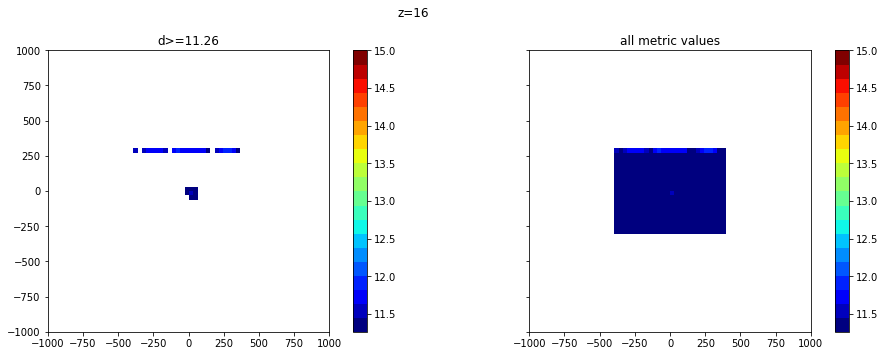

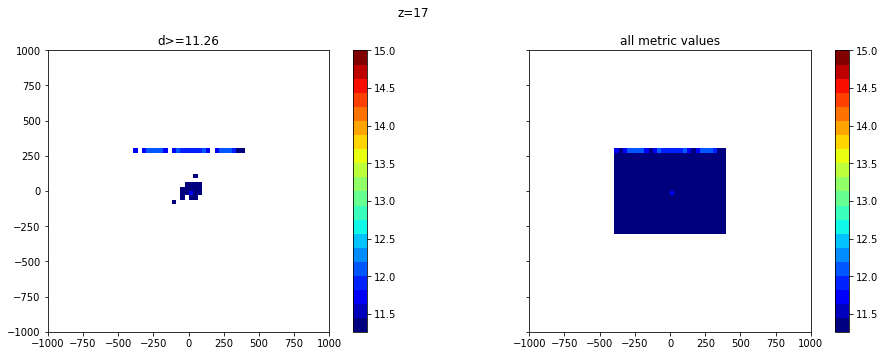

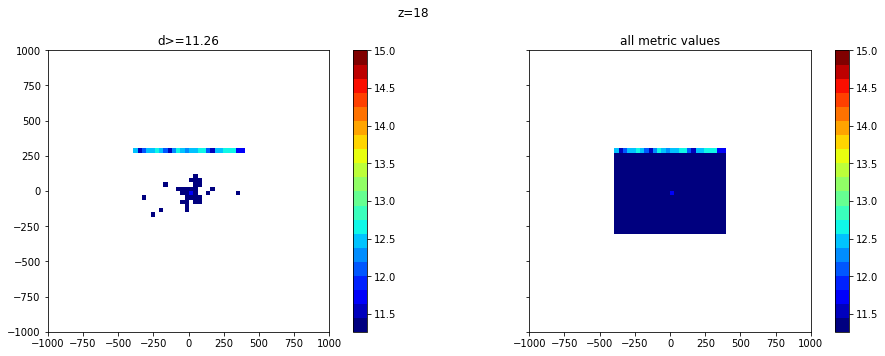

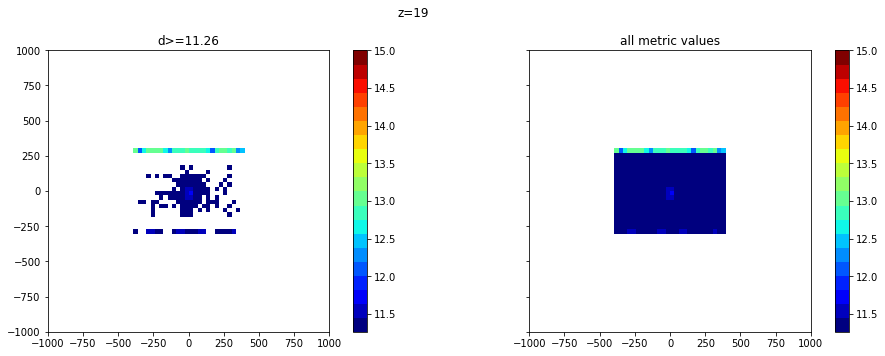

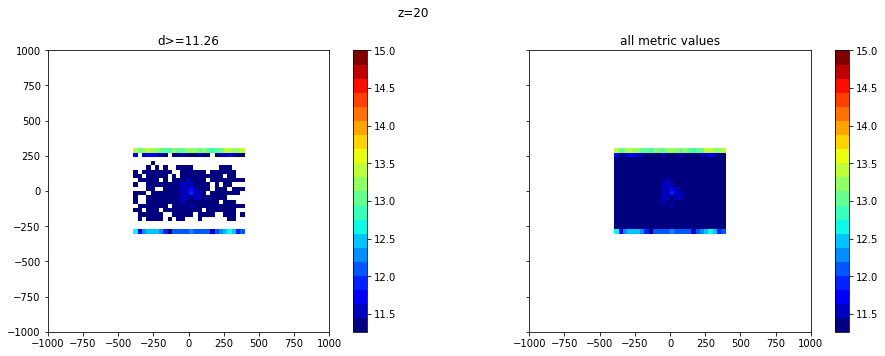

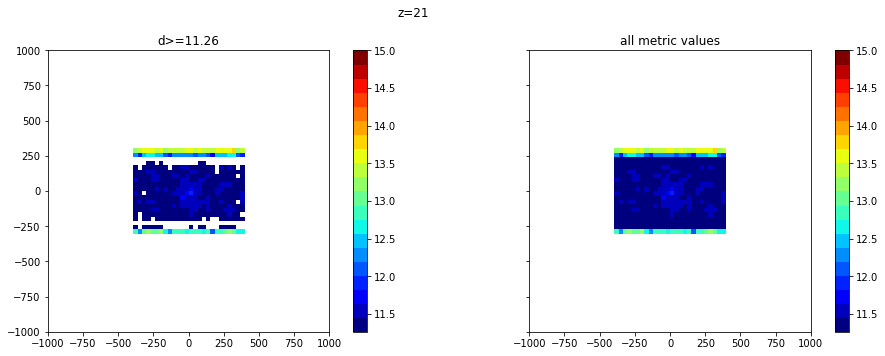

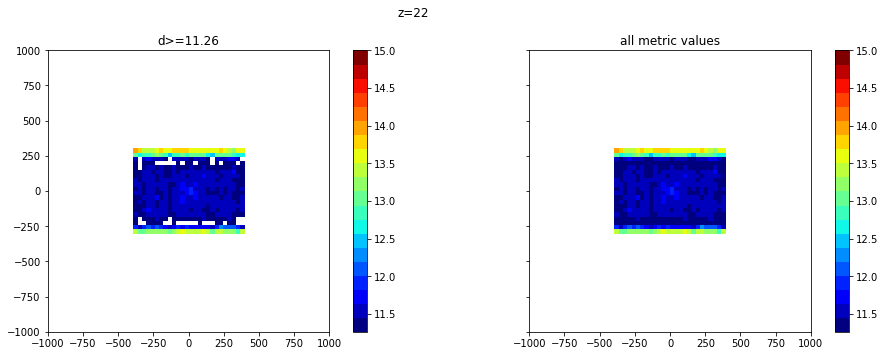

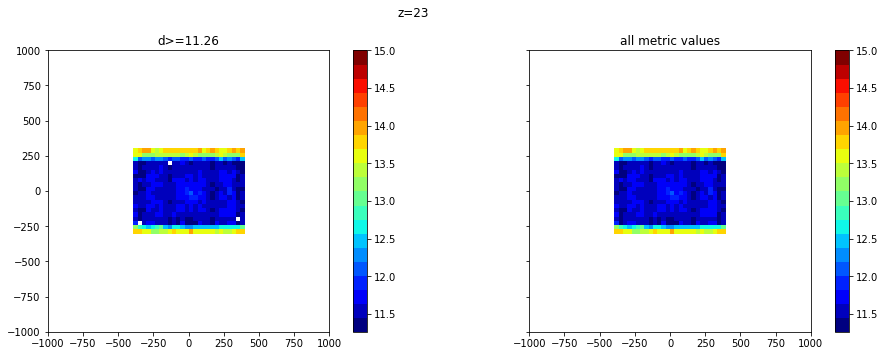

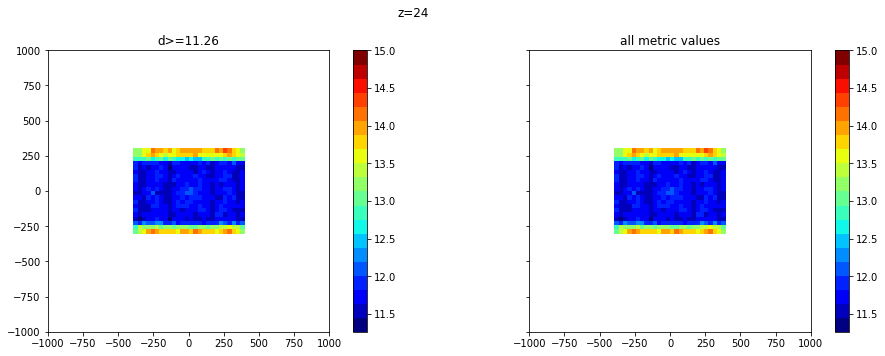

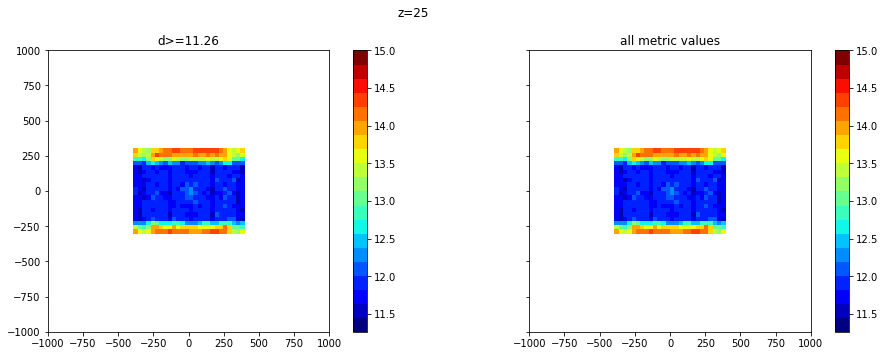

In [23]:
from matplotlib import cm, colors
cmap = cm.get_cmap('jet', 20)
norm = colors.Normalize(vmin=11.265, vmax=15)
cmap.set_bad(color='white')

air_histogram = np.copy(histogram)
air_histogram[air_histogram<11.265]=0
#set the background as white (default was min value of cmap -> blue) 
masked_hist_air = np.ma.masked_where(air_histogram == 0, air_histogram)
masked_hist = np.ma.masked_where(histogram == 0, histogram)

for i in range(7, 26):#filtered_hist.shape[2]):
    fig, ax = plt.subplots(1,2, figsize= (14,5),sharex=True, sharey=True)
    fig.suptitle('z={}'.format(i))
    im1 = ax[0].imshow(np.swapaxes(masked_hist_air, 0,1)[:,:,i], cmap=cmap, norm=norm, 
                       extent=[-1000,1000,-1000,1000])
    im2 = ax[1].imshow(np.swapaxes(masked_hist,0,1)[:,:,i], cmap=cmap, norm=norm, 
                       extent=[-1000,1000,-1000,1000]) #map (0,66) to (-1000,1000)
    
    ax[0].set_title('d>=11.26')
    ax[1].set_title('all metric values')
    
    fig.colorbar(im1, ax=ax[0], shrink=1)
    fig.colorbar(im2, ax=ax[1], shrink=1)
    plt.tight_layout()
    #plt.savefig("slices_z_{}.png".format(i))
    plt.show()

In [24]:
%load_ext notexbook

In [25]:
%texify